# EE379K Lab 6

## Irfan Hasan (ih3976), Peter Zhang (yz7724)

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

# Question 1

In [5]:
b = np.ones(50)

def generate_data ():
    X = np.random.randn(51, 50)
    e = np.random.randn(51) / 4.0
    y = np.dot(X, b) + e
    return X, y

def beta_hat (X, y, l):
    # (X_t*X + l*I)^(-1) * X_t * y
    Xt = X.transpose()
    tmp = np.power(np.dot(Xt, X) + l*np.identity(50), -1)
    return np.dot(np.dot(tmp, Xt), y)

## Part 1

In [52]:
B = []

for i in range(100):
    X, y = generate_data()
    b_h = beta_hat(X, y, 0)
    B.append(b_h[0])
    
print 'Mean: ', np.mean(B)
print 'Variance: ', np.var(B)

Mean:  -1884.25873746
Variance:  258933491.66


## Part 2

In [13]:
import timeit

lambdas = [0.01, 0.1, 1, 10, 100]

lr = LinearRegression()
loo = LeaveOneOut()

for l in lambdas:
    B = []
    ys = []
    
    for i in range(100):
        X, y = generate_data()
        b_h = beta_hat(X, y, l)
        ys.append(y.tolist())
        B.append(b_h[0])
    
    score = cross_val_score(lr, ys, B, cv=loo, scoring='neg_mean_squared_error').mean()
    
    print 'Mean: ', np.mean(B)
    print 'Variance: ', np.var(B)
    print 'LOOCV score: ', np.mean(score)
    print

Mean:  41.5826447579
Variance:  8665150.88541
LOOCV score:  -18423578.8958

Mean:  -713.633604424
Variance:  22144502.3239
LOOCV score:  -52006072.3118

Mean:  7412.82106925
Variance:  7881820855.74
LOOCV score:  -16810930738.8

Mean:  -393.746352638
Variance:  262008412.673
LOOCV score:  -590643236.026

Mean:  -5063.86925728
Variance:  3000011177.24
LOOCV score:  -6513322682.0



As lambda increases, the time it takes to process decreases and the variance decreases. The LOOCV score is proportionaly to variance.

# Question 2

## Part A

In [90]:
college = pd.read_csv('college.csv')
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [91]:
college = college.drop('Unnamed: 0', axis=1)
college['Private'] = college['Private'].map({'Yes':1, 'No':0})

In [94]:
x_train, x_test, y_train, y_test = train_test_split(college.drop('Apps', axis=1), college['Apps'])

## Part B

In [106]:
reg = LinearRegression()
reg.fit(x_train, y_train)

score = mean_squared_error(y_test, reg.predict(x_test))
print 'Linear model error: ', score

Linear model error:  827308.967084


## Part C

In [112]:
ridge = RidgeCV()
ridge.fit(x_train, y_train)

score = mean_squared_error(y_test, ridge.predict(x_test))
print 'Ridge model error: ', score

Ridge model error:  832586.306541


## Part D

In [115]:
lasso = LassoCV()
lasso.fit(x_train, y_train)

score = mean_squared_error(y_test, lasso.predict(x_test))
print 'Lasso model error: ', score

Lasso model error:  957278.333722


## Part E

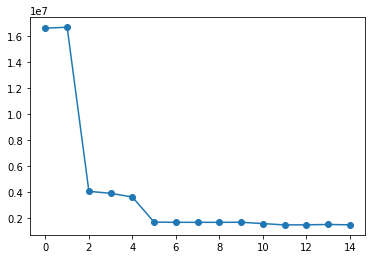

In [162]:
import matplotlib.pyplot as plt

pca = PCA()
x_reduced = pca.fit_transform(x_train)

n = len(x_reduced)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)

r = LinearRegression()
mse = []

score = -1*cross_val_score(r, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
mse.append(score)

for i in np.arange(1, 15):
    score = -1*cross_val_score(r, x_reduced[:, :i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(mse, '-o')
plt.show()

In [163]:
x_reduced_test = pca.transform(x_test)[:, :15]

r = LinearRegression()
r.fit(x_reduced_test[:, :15], y_test)

score = mean_squared_error(y_test, r.predict(x_reduced_test))
print 'PCR model error: ', score

PCR model error:  625151.373485


## Part F

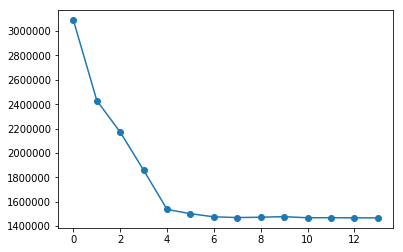

In [164]:
n = len(x_train)

kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)
mse=[]

for i in np.arange(2, 16):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, x_train, y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(mse, '-o')
plt.show()

In [181]:
pls = PLSRegression(n_components=8)
pls.fit(x_train, y_train)

score = mean_squared_error(y_test, pls.predict(x_test))
print 'PLS model error: ', score

PLS model error:  834800.545178


## Part G

We cannot precent the number one-hundred percent correctly. The errors generated by the five approaches are close except for PCR.